In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.data.experimental import AUTOTUNE as AUTO

In [2]:
data_csv = pd.read_csv('../input/eur-usd-forex-pair-historical-data-2002-2019/eurusd_hour.csv')

In [3]:
data_csv.head()

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008
1,2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002
2,2005-05-02,02:00,1.2843,1.2854,1.2841,1.2851,0.0008,1.2845,1.2856,1.2843,1.2853,0.0008
3,2005-05-02,03:00,1.2851,1.2859,1.2850,1.2851,0.0000,1.2853,1.2861,1.2852,1.2853,0.0000
4,2005-05-02,04:00,1.2852,1.2859,1.2849,1.2855,0.0003,1.2854,1.2861,1.2851,1.2857,0.0003


In [4]:
data_csv.set_index(['Date'], inplace=True)

In [5]:
data = data_csv.filter(['BC'])
data.head()

,BC
Date,
2005-05-02,1.2844
2005-05-02,1.2842
2005-05-02,1.2851
2005-05-02,1.2851
2005-05-02,1.2855


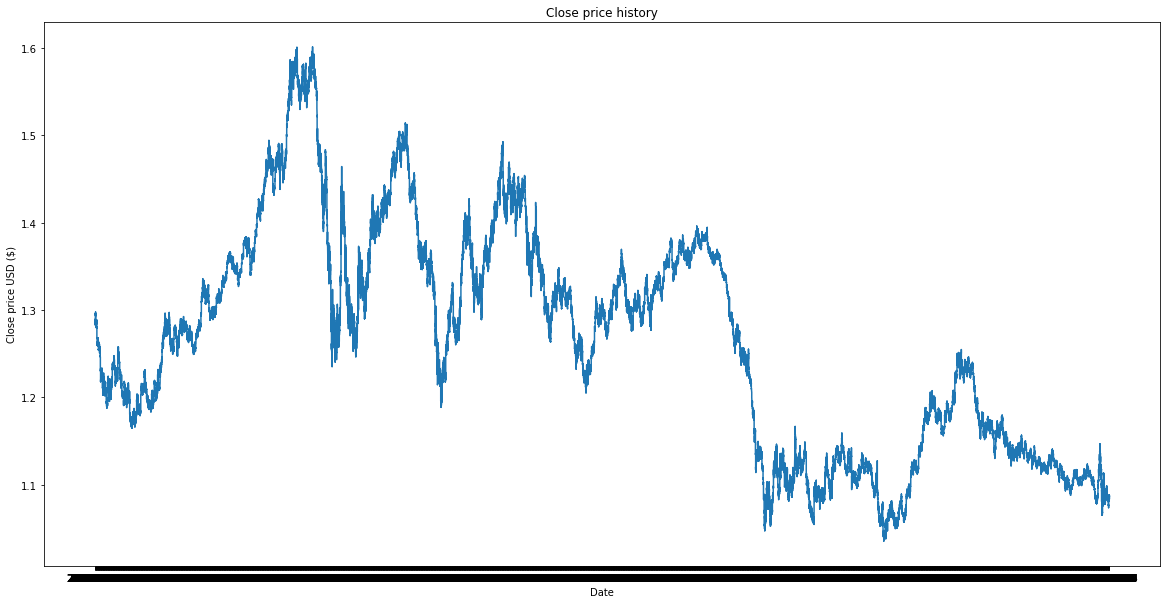

In [6]:
plt.figure(figsize=(20,10))
plt.title('Close price history')
plt.plot(data['BC'])
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.show()

In [7]:
dataset = data.values

In [8]:
training_data_len = math.ceil(len(dataset)*0.95)

In [9]:
print('Lenght of the training dataset: {}'.format(training_data_len))

Lenght the training dataset: 88430


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [11]:
scaled_data

array([[0.43978863],
       [0.43943518],
       [0.44102573],
       ...,
       [0.09106815],
       [0.09117418],
       [0.0916867 ]])

In [12]:
window = 30

In [13]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i, 0])

In [14]:
print('The train dataset {}, and the labels {}'.format(len(x_train), len(y_train)))

The train dataset 88400, and the labels 88400


In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
print('The shape of x_train: {}\nThe shape of y_train: {}' .format(x_train.shape, y_train.shape))

The shape of x_train: (88400, 30)
The shape of y_train: (88400,)


In [17]:
x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1], 1))

In [18]:
print('The new shape of x_train: {}'.format(x_train.shape))

The new shape of x_train: (88400, 30, 1)


In [19]:
def create_model():
    return Sequential(
    [LSTM(50, return_sequences=True, input_shape= (None, 1)),
    LSTM(50, return_sequences=False),
    Dense(100),
    Dense(50),
    Dense(1)])

In [20]:
model = create_model()
model.compile(optimizer='adamax', loss='mean_squared_error')

In [21]:
hist = model.fit(x_train, y_train, batch_size=30, epochs=50)

Epoch 1/50
2947/2947 [==============================] - 46s 14ms/step - loss: 0.0014
Epoch 2/50
2947/2947 [==============================] - 40s 13ms/step - loss: 4.3155e-05
Epoch 3/50
2947/2947 [==============================] - 41s 14ms/step - loss: 3.1095e-05
Epoch 4/50
2947/2947 [==============================] - 40s 13ms/step - loss: 2.0268e-05
Epoch 5/50
2947/2947 [==============================] - 40s 14ms/step - loss: 1.4565e-05
Epoch 6/50
2947/2947 [==============================] - 40s 13ms/step - loss: 1.3289e-05
Epoch 7/50
2947/2947 [==============================] - 40s 13ms/step - loss: 1.2437e-05
Epoch 8/50
2947/2947 [==============================] - 40s 14ms/step - loss: 1.2256e-05
Epoch 9/50
2947/2947 [==============================] - 40s 14ms/step - loss: 1.2873e-05
Epoch 10/50
2947/2947 [==============================] - 40s 14ms/step - loss: 1.1460e-05
Epoch 11/50
2947/2947 [==============================] - 40s 14ms/step - loss: 1.1772e-05
Epoch 12/50
2947/2947 [

In [43]:
window=30

In [44]:
test_data = scaled_data[training_data_len-window: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(window, len(test_data)):
      x_test.append(test_data[i-window:i,0])
  

In [45]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1], 1))
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


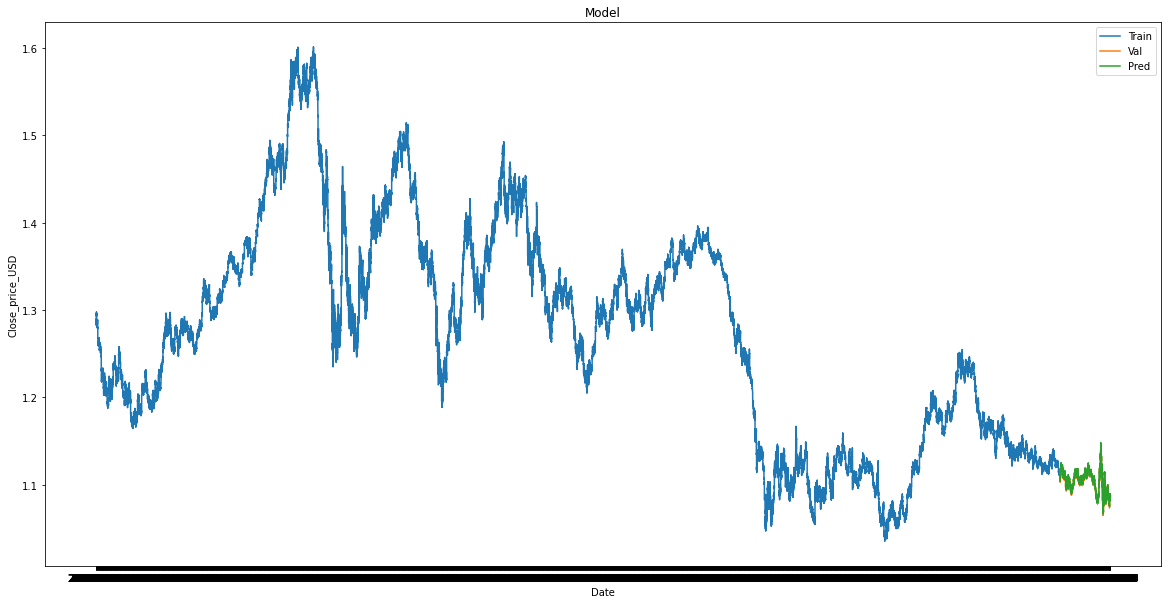

In [46]:
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = pred

plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close_price_USD')
plt.plot(train['BC'])
plt.plot(valid[['BC', 'Predictions']])
plt.legend(['Train', 'Val','Pred'])
plt.show()

In [47]:
valid.tail(5)

,BC,Predictions
Date,,
2020-04-29,1.08713,1.087598
2020-04-29,1.08748,1.088497
2020-04-29,1.08708,1.088830
2020-04-29,1.08714,1.088428
2020-04-29,1.08743,1.088486


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


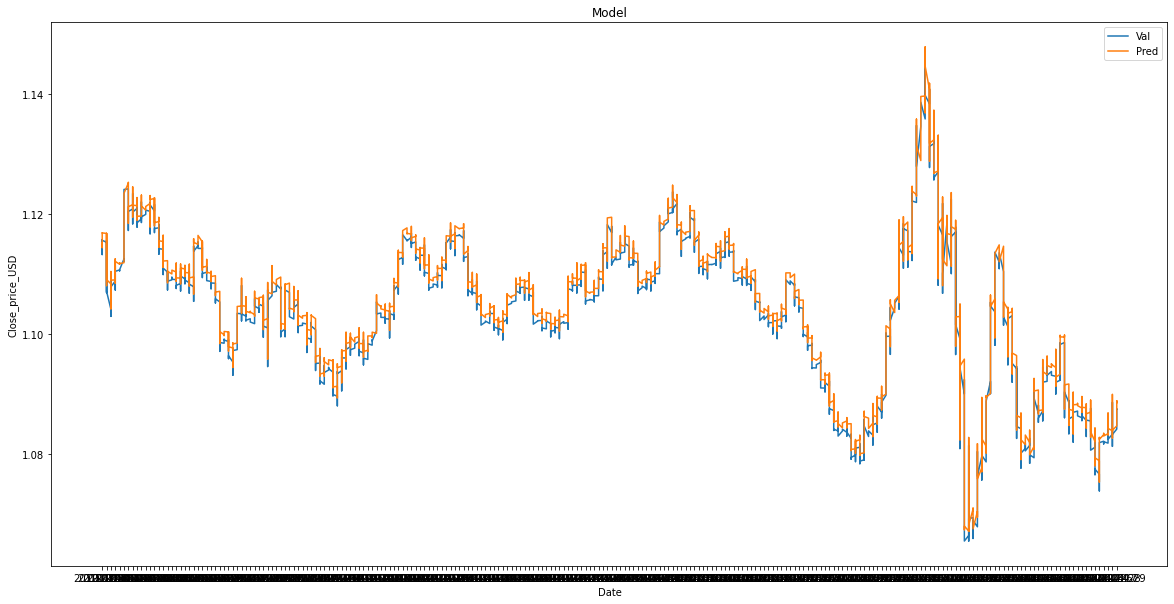

In [48]:
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = pred

plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close_price_USD')
plt.plot(valid[['BC', 'Predictions']])
plt.legend(['Val','Pred'])
plt.show()